In [24]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from BCG_CG_ichol import BCG, conjugate_grad, ichol

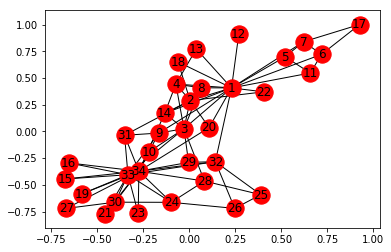

In [25]:
kn = nx.read_gml('karate.gml', label='id')
#nx.write_gml(kn, 'karate2.gml')
nx.draw_networkx(kn) #Draw the graph

In [26]:
pr = nx.algorithms.link_analysis.pagerank(kn)

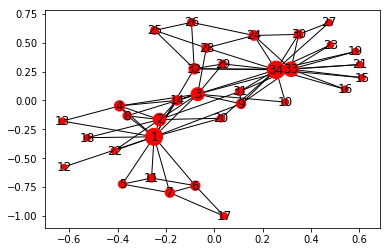

In [27]:
pr_vector = list(pr.values())
pr_vector = np.array(pr_vector) * 3000
nx.draw_networkx(kn, node_size=pr_vector, labels=None)

In [28]:
f = open('karate.gml')
graph = f.readlines()
f.close()

In [29]:
L = np.zeros(34)
for i in range(len(graph)):
    if 'source' in graph[i]:
        node = int(graph[i].split()[1])
        L[node-1] += 1

In [30]:
N = np.zeros([34,34])

In [31]:
for i in range(len(graph)):
    if 'source' in graph[i]:
        source = int(graph[i].split()[1]) - 1
        target = int(graph[i+1].split()[1]) - 1
       
        N[source][target] = 1
        N[target][source] = 1

In [32]:
for i in range(len(L)):
    if L[i] == 0:
        L[i] = np.inf

In [33]:
p = np.fromiter(pr.values(), dtype=float)

In [34]:
G = 1/L

In [35]:
A = N * G

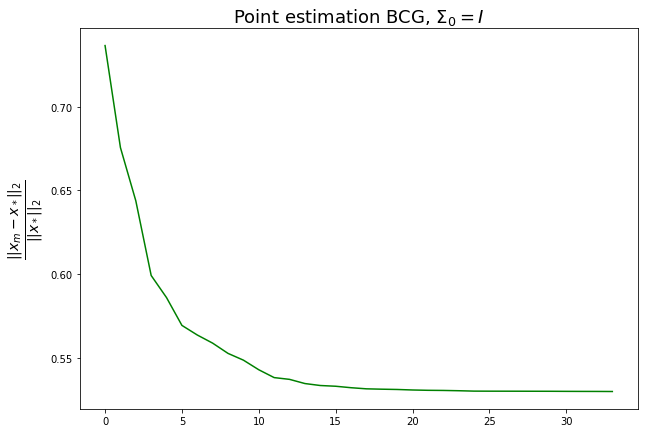

In [40]:
plt.figure(figsize=(10, 7))
np.random.seed(58)
x = np.random.rand(34, 1)

b = A.dot(x).reshape(34, 1)
eq = BCG(A, b, np.zeros((34, 1)), np.eye(34), 10^(-4), 34)
_, _, _, point_est, _ = eq.bcg(x)
plt.plot(point_est, color='green')
plt.title(r'Point estimation BCG, $\Sigma_0 = I$', fontsize=18);
plt.ylabel(r'$\frac{|| x_m - x_*||_2}{|| x_*||_2}$', fontsize=20);
#plt.ylim([10**(-6), 1]);

###  Doesn't converge

In [37]:
point_est

array([0.73637288, 0.6755667 , 0.6438383 , 0.59931965, 0.58611926,
       0.56956925, 0.56384018, 0.55898599, 0.55287847, 0.54885942,
       0.54312772, 0.53845608, 0.53740378, 0.5349144 , 0.53373986,
       0.53330237, 0.53242922, 0.53176288, 0.53154613, 0.53137831,
       0.53107023, 0.53088135, 0.53080066, 0.53063002, 0.53039495,
       0.5303628 , 0.53035072, 0.53033686, 0.53031615, 0.53030044,
       0.53025513, 0.53022508, 0.53021021, 0.53016744])

In [38]:
np.linalg.eigvals(A)

array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j,  2.26888776e+00+0.00000000e+00j,
       -1.82087670e+00+0.00000000e+00j, -1.32934867e+00+0.00000000e+00j,
        1.06505455e+00+0.00000000e+00j,  6.74964479e-01+0.00000000e+00j,
        5.27025587e-01+0.00000000e+00j, -5.90546937e-01+0.00000000e+00j,
       -5.81918073e-01+0.00000000e+00j, -4.08922334e-01+0.00000000e+00j,
       -3.03414718e-01+0.00000000e+00j,  3.49782189e-01+0.00000000e+00j,
        2.06212918e-01+0.00000000e+00j, -1.44608061e-01+0.00000000e+00j,
        8.77080180e-02+0.00000000e+00j,  1.41923048e+00+0.00000000e+00j,
       -1.18373181e+00+0.00000000e+00j,  4.09903030e-01+0.00000000e+00j,
        1.37540183e-16+0.00000000e+00j, -6.45401702

### Singular matrix